#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [192]:
import pandas as pd
import numpy as np
from IPython.display import display as dsp
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
# Load your dataset
path = '/content/Salaries.csv'
df = pd.read_csv(path)
df

Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                       Custodian       0.00   
148650                                    Not provided        NaN   
148651                                    Not provided        NaN   
148652                                    Not provided        NaN   
148653                      Counselor, Log Cabin Ranch       0.00   

        OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  \
0              0.00  400184.25       NaN  567595.43         567595.43  2011   
1         245131.88  137811.38       NaN  538909.28         538909.28  2011   
2         106088.18   16452.60       NaN  335279.91         335279.91  2011   
3          56120.71  198306.90       NaN  332343.61         332343.61  2011   
4           9737.00  182234.59       NaN  326373.19         326373.19  2011   
...             ...        ...       ...        ...               ...   ...   
148649         0.00       0.00       0.0       0.00              0.00  2014   
148650          NaN        NaN       NaN       0.00              0.00  2014   
148651          NaN        NaN       NaN       0.00              0.00  2014   
148652          NaN        NaN       NaN       0.00              0.00  2014   
148653         0.00    -618.13       0.0    -618.13           -618.13  2014   

        Notes         Agency  Status  
0         NaN  San Francisco     NaN  
1         NaN  San Francisco     NaN  
2         NaN  San Francisco     NaN  
3         NaN  San Francisco     NaN  
4         NaN  San Francisco     NaN  
...       ...            ...     ...  
148649    NaN  San Francisco     NaN  
148650    NaN  San Francisco     NaN  
148651    NaN  San Francisco     NaN  
148652    NaN  San Francisco     NaN  
148653    NaN  San Francisco     NaN  

[148654 rows x 13 columns]

# Step1: Basic Data Exploration

In [193]:
# Identification of the number of rows and columns in the dataset

print(f'Our dataset contains {df.shape[0]:,} rows and {df.shape[1]:,} columns')

Our dataset contains 148,654 rows and 13 columns


In [194]:
# Determine the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [195]:
# Quick insight
df_num_types = [True for col in df.columns if df[col].dtype in ['int64', 'float64']]
df_cat_types = [True for col in df.columns if df[col].dtype in ['o', 'object']]

print(f'In our dataset, there are ({len(df_num_types)}) numerical attributes and ({len(df_cat_types)}) categorical variables.')

In our dataset, there are (10) numerical attributes and (3) categorical variables.


In [196]:
# Checking for missing values in each column

df_miss_val = df.isna().sum().to_frame().rename({0: 'Total_Missing'}, axis = 1)
df_miss_val['Total_Missing'] = df_miss_val['Total_Missing'].apply(lambda num:format(num, ','))
df_miss_val
# df.isnull().any()

Total_Missing
Id                           0
EmployeeName                 0
JobTitle                     0
BasePay                    609
OvertimePay                  4
OtherPay                     4
Benefits                36,163
TotalPay                     0
TotalPayBenefits             0
Year                         0
Notes                  148,654
Agency                       0
Status                 148,654

#Step2: Descriptive Statistics

In [197]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries,
# and find the standard deviation.
df_sal_stat = df['TotalPay'].describe().to_frame().rename({'TotalPay': 'Salary'}, axis = 1).rename({'50%': 'median'})
df_sal_stat.loc['mode'] = df['TotalPay'].mode()[0]
df_sal_stat.loc['range'] = df_sal_stat.loc['max'] - df_sal_stat.loc['min']
df_sal_stat['Salary'] =df_sal_stat['Salary'].apply(lambda num: format(num, ',.2f'))
df_sal_stat

Salary
count   148,654.00
mean     74,768.32
std      50,517.01
min        -618.13
25%      36,169.00
median   71,426.61
75%     105,839.13
max     567,595.43
mode          0.00
range   568,213.56

#Step3: Data Cleaning

In [198]:
# Handle missing data by suitable method with explain why you use it.

# We will be focusing on the missing values within the numerical variables only; for being
# the categorical attributes that contain missing values are considered not of high influence

In [199]:
# Before proceeding with the missing values, we need to make sure there is no duplicate value
# on the level of 'Id'
df['Id'].is_unique

True

In [200]:
# Step 3.a: Create a numerical dataframe that contains only the essential features we need (by
# also droppring both the numerical 'Status' & 'Notes' which we find it of lower importance)

df_num = df.drop(['Status', 'Notes'], axis = 1).select_dtypes(include = np.number)
df_num.head()

Id    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0   1  167411.18         0.00  400184.25       NaN  567595.43   
1   2  155966.02    245131.88  137811.38       NaN  538909.28   
2   3  212739.13    106088.18   16452.60       NaN  335279.91   
3   4   77916.00     56120.71  198306.90       NaN  332343.61   
4   5  134401.60      9737.00  182234.59       NaN  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011  
1         538909.28  2011  
2         335279.91  2011  
3         332343.61  2011  
4         326373.19  2011

In [201]:
# Step 3.b: Finding the attributes that only encompass missing values within the above
# created numerical dataframe in Step 3.a

df_num_check_null = df_num.isna().sum().to_frame()
df_num_isnull = df_num_check_null[df_num_check_null[0] !=0]
ind = df_num_isnull.index
print('The Considered Numerical Features that Only Contain Null Values:\n',ind)
dsp(df_num_check_null.rename({0: 'Total Missing'}, axis = 1).loc[ind])


The Considered Numerical Features that Only Contain Null Values:
 Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits'], dtype='object')


Total Missing
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163

In [202]:
# Step 3.c: In this step, we decided firstly to cure the missing columns not with the
# built-in method in pandas 'fillna()' to fill the missing values with the mean()
#  of each column as shown in the following syntax:
# df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].mean())
# Instead, we will fill in each column the missing value with mean of each group
# of job; Then if NAN values remain we will use the fillNA

# col = 'BasePay'
def replace_miss_val(df):
  # Converting Categorical Columns into 'Upper' & 'Stripped' formatted string (object) values
  for col in df.select_dtypes(include = ['O']).columns:
    df[col] = df[col].apply(str.upper)
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

  for i in range(len(ind)):
    col = ind[i]
    df[col] = df[col].abs()
    df_by_job = df.groupby('JobTitle').mean()[col].to_frame()
    # dsp(df_by_job)
    for index, value in df[col].notnull().iteritems():
      if not value:
        df.loc[index,[col]] = df_by_job.loc[df.loc[index,['JobTitle']][0]][0]
  # df_by_col = df[df[col] == 'NaN']
  # print(df_by_col.index)
  # for i in list(df_by_col.index):
  #   df.loc[i,[col]] = df_by_job.loc[df.loc[i,['JobTitle']][0]][0]
  return df


df = replace_miss_val(df)

df
# df_by_job = df.groupby('JobTitle').mean()[col].to_frame()
# dsp(df_by_job)
#   # dsp(df_by_job)
# df_by_col = df[df[col] == 0][[col,'JobTitle']]
# dsp(df_by_col)
# print(df_by_col.index)
# for i in list(df_by_col.index):
#   df_by_col.loc[i,[col]] = df_by_job.loc[df_by_col.loc[i,['JobTitle']][0]][0]

# dsp(df_by_col)

<ipython-input-202-a19c4ff44578>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_job = df.groupby('JobTitle').mean()[col].to_frame()
<ipython-input-202-a19c4ff44578>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[col].notnull().iteritems():
<ipython-input-202-a19c4ff44578>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_job = df.groupby('JobTitle').mean()[col].to_frame()
<ipython-input-202-a19c4ff44578>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for

Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      ROY I TILLERY   
148650  148651       NOT PROVIDED   
148651  148652       NOT PROVIDED   
148652  148653       NOT PROVIDED   
148653  148654          JOE LOPEZ   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                       CUSTODIAN       0.00   
148650                                    NOT PROVIDED        NaN   
148651                                    NOT PROVIDED        NaN   
148652                                    NOT PROVIDED        NaN   
148653                      COUNSELOR, LOG CABIN RANCH       0.00   

        OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year  \
0              0.00  400184.25       NaN  567595.43         567595.43  2011   
1         245131.88  137811.38       NaN  538909.28         538909.28  2011   
2         106088.18   16452.60       NaN  335279.91         335279.91  2011   
3          56120.71  198306.90       NaN  332343.61         332343.61  2011   
4           9737.00  182234.59       NaN  326373.19         326373.19  2011   
...             ...        ...       ...        ...               ...   ...   
148649         0.00       0.00       0.0       0.00              0.00  2014   
148650          NaN        NaN       NaN       0.00              0.00  2014   
148651          NaN        NaN       NaN       0.00              0.00  2014   
148652          NaN        NaN       NaN       0.00              0.00  2014   
148653         0.00     618.13       0.0    -618.13           -618.13  2014   

        Notes         Agency  Status  
0         NaN  SAN FRANCISCO     NaN  
1         NaN  SAN FRANCISCO     NaN  
2         NaN  SAN FRANCISCO     NaN  
3         NaN  SAN FRANCISCO     NaN  
4         NaN  SAN FRANCISCO     NaN  
...       ...            ...     ...  
148649    NaN  SAN FRANCISCO     NaN  
148650    NaN  SAN FRANCISCO     NaN  
148651    NaN  SAN FRANCISCO     NaN  
148652    NaN  SAN FRANCISCO     NaN  
148653    NaN  SAN FRANCISCO     NaN  

[148654 rows x 13 columns]

In [203]:
# Repeating Steps 3.a & 3.b to verify the new numbers of missing
df_num = df.drop(['Status', 'Notes'], axis = 1).select_dtypes(include = np.number)
df_num_check_null = df_num.isna().sum().to_frame()
df_num_isnull = df_num_check_null[df_num_check_null[0] !=0]
ind = df_num_isnull.index
print('The Considered Numerical Features that Only Contain Null Values:\n',ind)
dsp(df_num_check_null.rename({0: 'Total Missing'}, axis = 1).loc[ind])

The Considered Numerical Features that Only Contain Null Values:
 Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits'], dtype='object')


Total Missing
BasePay                  8
OvertimePay              4
OtherPay                 4
Benefits             12241

In [204]:
# Step 3.d: The number of missing values in 'BasePay' dropped from 609 to 8; the others remain
# the same; now, in this step we will apply the fillna() method with the mean of each column.
for i in range(len(ind)):
  col = ind[i]
  col_mean = df[col].mean()
  df[col] = df[col].fillna(col_mean)


In [205]:
# Repeating Steps 3.a & 3.b to verify if any missing value remains
df_num = df.drop(['Status', 'Notes'], axis = 1).select_dtypes(include = np.number)
df_num_check_null = df_num.isna().sum().to_frame()
df_num_isnull = df_num_check_null[df_num_check_null[0] !=0]
ind = df_num_isnull.index
print('The Considered Numerical Features that Only Contain Null Values:\n',ind)
dsp(df_num_check_null.rename({0: 'Total Missing'}, axis = 1).loc[ind])
df

The Considered Numerical Features that Only Contain Null Values:
 Index([], dtype='object')


Empty DataFrame
Columns: [Total Missing]
Index: []

Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      ROY I TILLERY   
148650  148651       NOT PROVIDED   
148651  148652       NOT PROVIDED   
148652  148653       NOT PROVIDED   
148653  148654          JOE LOPEZ   

                                              JobTitle        BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.180000   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.020000   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.130000   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.000000   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.600000   
...                                                ...            ...   
148649                                       CUSTODIAN       0.000000   
148650                                    NOT PROVIDED   66284.963532   
148651                                    NOT PROVIDED   66284.963532   
148652                                    NOT PROVIDED   66284.963532   
148653                      COUNSELOR, LOG CABIN RANCH       0.000000   

          OvertimePay       OtherPay      Benefits   TotalPay  \
0            0.000000  400184.250000  24909.522745  567595.43   
1       245131.880000  137811.380000  24909.522745  538909.28   
2       106088.180000   16452.600000  24909.522745  335279.91   
3        56120.710000  198306.900000  24909.522745  332343.61   
4         9737.000000  182234.590000  24909.522745  326373.19   
...               ...            ...           ...        ...   
148649       0.000000       0.000000      0.000000       0.00   
148650    5066.059887    3648.872016  24909.522745       0.00   
148651    5066.059887    3648.872016  24909.522745       0.00   
148652    5066.059887    3648.872016  24909.522745       0.00   
148653       0.000000     618.130000      0.000000    -618.13   

        TotalPayBenefits  Year  Notes         Agency  Status  
0              567595.43  2011    NaN  SAN FRANCISCO     NaN  
1              538909.28  2011    NaN  SAN FRANCISCO     NaN  
2              335279.91  2011    NaN  SAN FRANCISCO     NaN  
3              332343.61  2011    NaN  SAN FRANCISCO     NaN  
4              326373.19  2011    NaN  SAN FRANCISCO     NaN  
...                  ...   ...    ...            ...     ...  
148649              0.00  2014    NaN  SAN FRANCISCO     NaN  
148650              0.00  2014    NaN  SAN FRANCISCO     NaN  
148651              0.00  2014    NaN  SAN FRANCISCO     NaN  
148652              0.00  2014    NaN  SAN FRANCISCO     NaN  
148653           -618.13  2014    NaN  SAN FRANCISCO     NaN  

[148654 rows x 13 columns]

In [206]:
# Updating the new value of 'TotalPay' & 'TotalPayBenefits'
df['TotalPay'] = df['BasePay'] + df['OvertimePay'] + df['OtherPay']
df['TotalPayBenefits'] = df['TotalPay'] + df['Benefits']
df

Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      ROY I TILLERY   
148650  148651       NOT PROVIDED   
148651  148652       NOT PROVIDED   
148652  148653       NOT PROVIDED   
148653  148654          JOE LOPEZ   

                                              JobTitle        BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.180000   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.020000   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.130000   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.000000   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.600000   
...                                                ...            ...   
148649                                       CUSTODIAN       0.000000   
148650                                    NOT PROVIDED   66284.963532   
148651                                    NOT PROVIDED   66284.963532   
148652                                    NOT PROVIDED   66284.963532   
148653                      COUNSELOR, LOG CABIN RANCH       0.000000   

          OvertimePay       OtherPay      Benefits       TotalPay  \
0            0.000000  400184.250000  24909.522745  567595.430000   
1       245131.880000  137811.380000  24909.522745  538909.280000   
2       106088.180000   16452.600000  24909.522745  335279.910000   
3        56120.710000  198306.900000  24909.522745  332343.610000   
4         9737.000000  182234.590000  24909.522745  326373.190000   
...               ...            ...           ...            ...   
148649       0.000000       0.000000      0.000000       0.000000   
148650    5066.059887    3648.872016  24909.522745   74999.895435   
148651    5066.059887    3648.872016  24909.522745   74999.895435   
148652    5066.059887    3648.872016  24909.522745   74999.895435   
148653       0.000000     618.130000      0.000000     618.130000   

        TotalPayBenefits  Year  Notes         Agency  Status  
0          592504.952745  2011    NaN  SAN FRANCISCO     NaN  
1          563818.802745  2011    NaN  SAN FRANCISCO     NaN  
2          360189.432745  2011    NaN  SAN FRANCISCO     NaN  
3          357253.132745  2011    NaN  SAN FRANCISCO     NaN  
4          351282.712745  2011    NaN  SAN FRANCISCO     NaN  
...                  ...   ...    ...            ...     ...  
148649          0.000000  2014    NaN  SAN FRANCISCO     NaN  
148650      99909.418181  2014    NaN  SAN FRANCISCO     NaN  
148651      99909.418181  2014    NaN  SAN FRANCISCO     NaN  
148652      99909.418181  2014    NaN  SAN FRANCISCO     NaN  
148653        618.130000  2014    NaN  SAN FRANCISCO     NaN  

[148654 rows x 13 columns]

#Step4: Basic Data Visualization

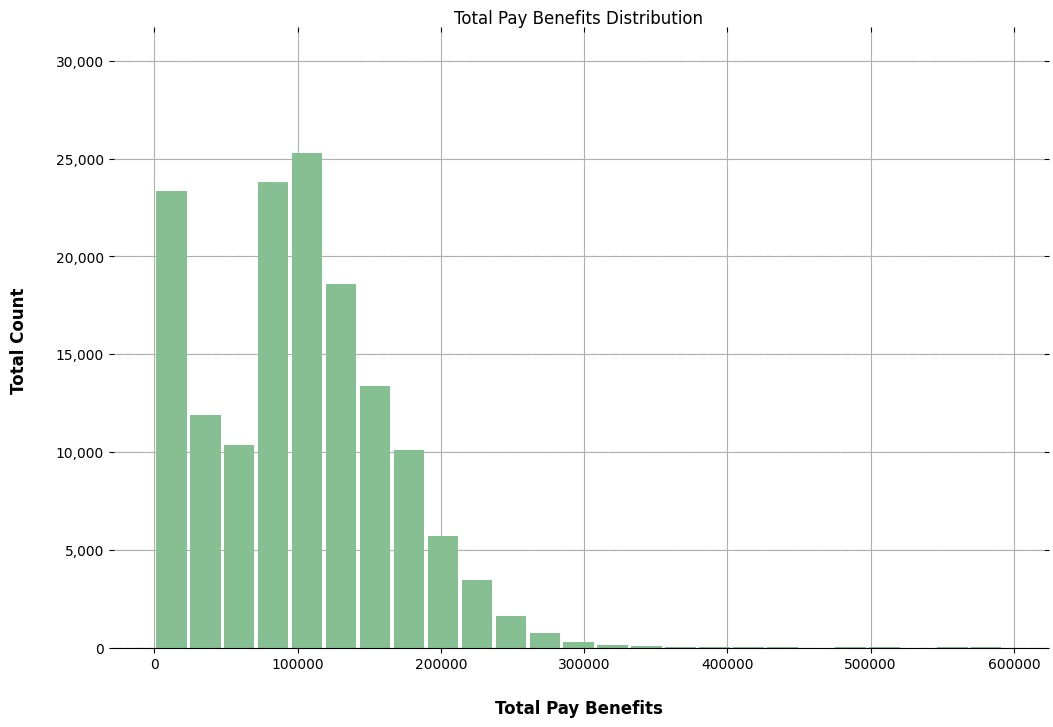

In [207]:
# Creation of histogram to visualize the distribution of salaries
ax = df.hist(column='TotalPayBenefits', bins=25, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Add title
    x.set_title("Total Pay Benefits Distribution")

    # Set x-axis label
    x.set_xlabel("Total Pay Benefits", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Total Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

(-1.0999994499243895,
 1.1000004825564755,
 -1.0999999625935521,
 1.0999999698873129)

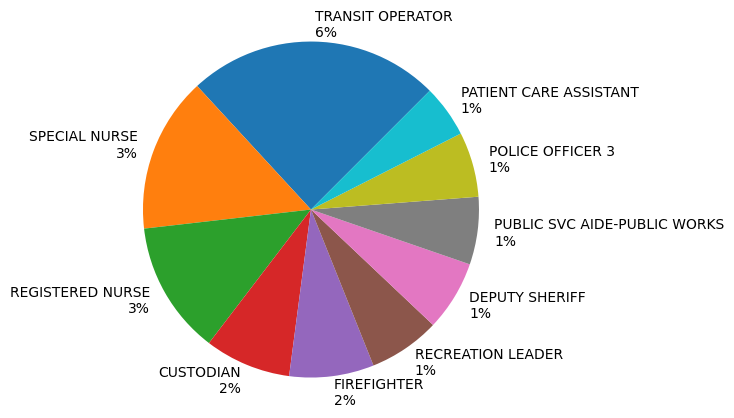

In [208]:
# Usage of pie charts to represent the proportion of employees in different departments.
# Selecting the Top 10
# df_dept = df.groupby(['JobTitle']).size()
counts = df['JobTitle'].value_counts()[:10]
ord=[job +"\n"+ str(int(counts[job]/df.shape[0]*100))+"%" for job in counts.index]
plt.pie(counts, labels = ord, startangle = 45,counterclock = True);
plt.axis('square')

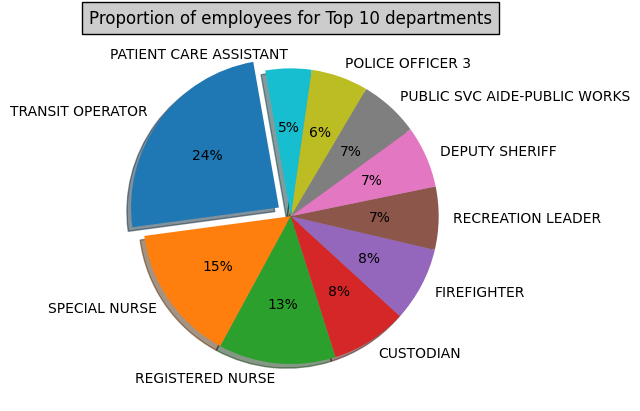

In [209]:
counts = 100* df['JobTitle'].value_counts()[:10]/df.shape[0]

jobs = list(counts.index)
# print(jobs)
counts = list(counts.values)
# print(counts[1]/sum(counts))
# print(counts)
# #colors = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# explode 1st slice
explode = tuple(list(0.1 if i==0 else 0 for i in range(len(jobs))))
# Plot

plt.pie(counts, explode=explode, labels=jobs, autopct= '%1.0f%%', shadow=True, startangle=100, radius = 1)
plt.title("Proportion of employees for Top 10 departments", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#Step5: Grouped Analysis

In [210]:
# Group the data by one or more columns and calculate summary statistics for each group,
# and compare the average salaries across different groups.

In [211]:
# Grouping by Job Title & Employee Name
df.groupby(['JobTitle', 'EmployeeName'])[['TotalPayBenefits']].agg(['min', 'max', 'mean'])

TotalPayBenefits  \
                                                                                   min   
JobTitle                                       EmployeeName                              
ACCOUNT CLERK                                  ALICE A BRONSON            81248.980000   
                                               ALICE BRONSON              63329.314590   
                                               ALISHA B WILLIS            76394.270000   
                                               ALISHA WILLIS              31158.594590   
                                               ALMA D HERNANDEZ LICEA     28420.680000   
...                                                                                ...   
YOUTH COMM ADVISOR                             MARIO R YEDIDIA            24957.240000   
                                               MARIO YEDIDIA              85774.390000   
                                               PHIMY TRUONG               52011.190000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS MARIO YEDIDIA              78542.392745   
ZOO CURATOR                                    MYRON SULAK                91596.082745   

                                                                                     \
                                                                                max   
JobTitle                                       EmployeeName                           
ACCOUNT CLERK                                  ALICE A BRONSON         81629.820000   
                                               ALICE BRONSON           77388.330000   
                                               ALISHA B WILLIS         76394.270000   
                                               ALISHA WILLIS           71702.680000   
                                               ALMA D HERNANDEZ LICEA  28420.680000   
...                                                                             ...   
YOUTH COMM ADVISOR                             MARIO R YEDIDIA         24957.240000   
                                               MARIO YEDIDIA           85774.390000   
                                               PHIMY TRUONG            77731.380000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS MARIO YEDIDIA           78542.392745   
ZOO CURATOR                                    MYRON SULAK             91596.082745   

                                                                                     
                                                                               mean  
JobTitle                                       EmployeeName                          
ACCOUNT CLERK                                  ALICE A BRONSON         81439.400000  
                                               ALICE BRONSON           70358.822295  
                                               ALISHA B WILLIS         76394.270000  
                                               ALISHA WILLIS           51430.637295  
                                               ALMA D HERNANDEZ LICEA  28420.680000  
...                                                                             ...  
YOUTH COMM ADVISOR                             MARIO R YEDIDIA         24957.240000  
                                               MARIO YEDIDIA           85774.390000  
                                               PHIMY TRUONG            64871.285000  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS MARIO YEDIDIA           78542.392745  
ZOO CURATOR                                    MYRON SULAK             91596.082745  

[89170 rows x 3 columns]

In [212]:
# df_dup_empl = df[df['EmployeeName'].duplicated() == True]['EmployeeName'].to_frame()
# df_dup_empl.groupby(['EmployeeName']).size()

In [213]:
# Grouping by Employee Name
df.groupby(['EmployeeName'])[['TotalPayBenefits']].agg(['min', 'max', 'mean'])

TotalPayBenefits                              
                                   min            max           mean
EmployeeName                                                        
A BERNARD FATOOH          22994.631154   30153.030000   26510.437788
A ELIZABETH MARCHASIN     52555.795543   52555.795543   52555.795543
A JAMIL NIAZI            112405.732745  112405.732745  112405.732745
A K FINIZIO               26113.370000   26113.370000   26113.370000
A. JAMES ROBERTSON II     22601.800000   24417.000392   23243.500131
...                                ...            ...            ...
ZUN JIN ZHANG HE          72533.901617   84972.760000   81673.022904
ZUNA LUU                  70570.501617   79957.940000   75264.220809
ZUNA T LUU                80932.300000   82151.220000   81541.760000
ZUREN MEI                 77722.441617   77722.441617   77722.441617
ZURI JONES                89538.480000  122350.860000  101320.227825

[70651 rows x 3 columns]

In [214]:
# Grouping by Job Title
df.groupby(['JobTitle'])[['TotalPayBenefits']].agg(['min', 'max', 'mean'])

TotalPayBenefits  \
                                                            min   
JobTitle                                                          
ACCOUNT CLERK                                          0.000000   
ACCOUNTANT                                         26057.922745   
ACCOUNTANT I                                       28110.760000   
ACCOUNTANT II                                       1799.960000   
ACCOUNTANT III                                       213.220000   
...                                                         ...   
WORKER'S COMPENSATION SUPERVISOR I                110186.912745   
X-RAY LABORATORY AIDE                               1017.070000   
YOUTH COMM ADVISOR                                 24957.240000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS     78542.392745   
ZOO CURATOR                                        91596.082745   

                                                                              
                                                          max           mean  
JobTitle                                                                      
ACCOUNT CLERK                                    91262.070000   63285.020888  
ACCOUNTANT                                       90301.532745   72338.790745  
ACCOUNTANT I                                    100245.900000   88122.188750  
ACCOUNTANT II                                   112654.810000   95086.024027  
ACCOUNTANT III                                  143869.550000  108309.332626  
...                                                       ...            ...  
WORKER'S COMPENSATION SUPERVISOR I              120194.152745  115930.248745  
X-RAY LABORATORY AIDE                           129044.160000   69909.459548  
YOUTH COMM ADVISOR                               85774.390000   60118.550000  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   78542.392745   78542.392745  
ZOO CURATOR                                      91596.082745   91596.082745  

[1637 rows x 3 columns]

#Step6: Simple Correlation Analysis

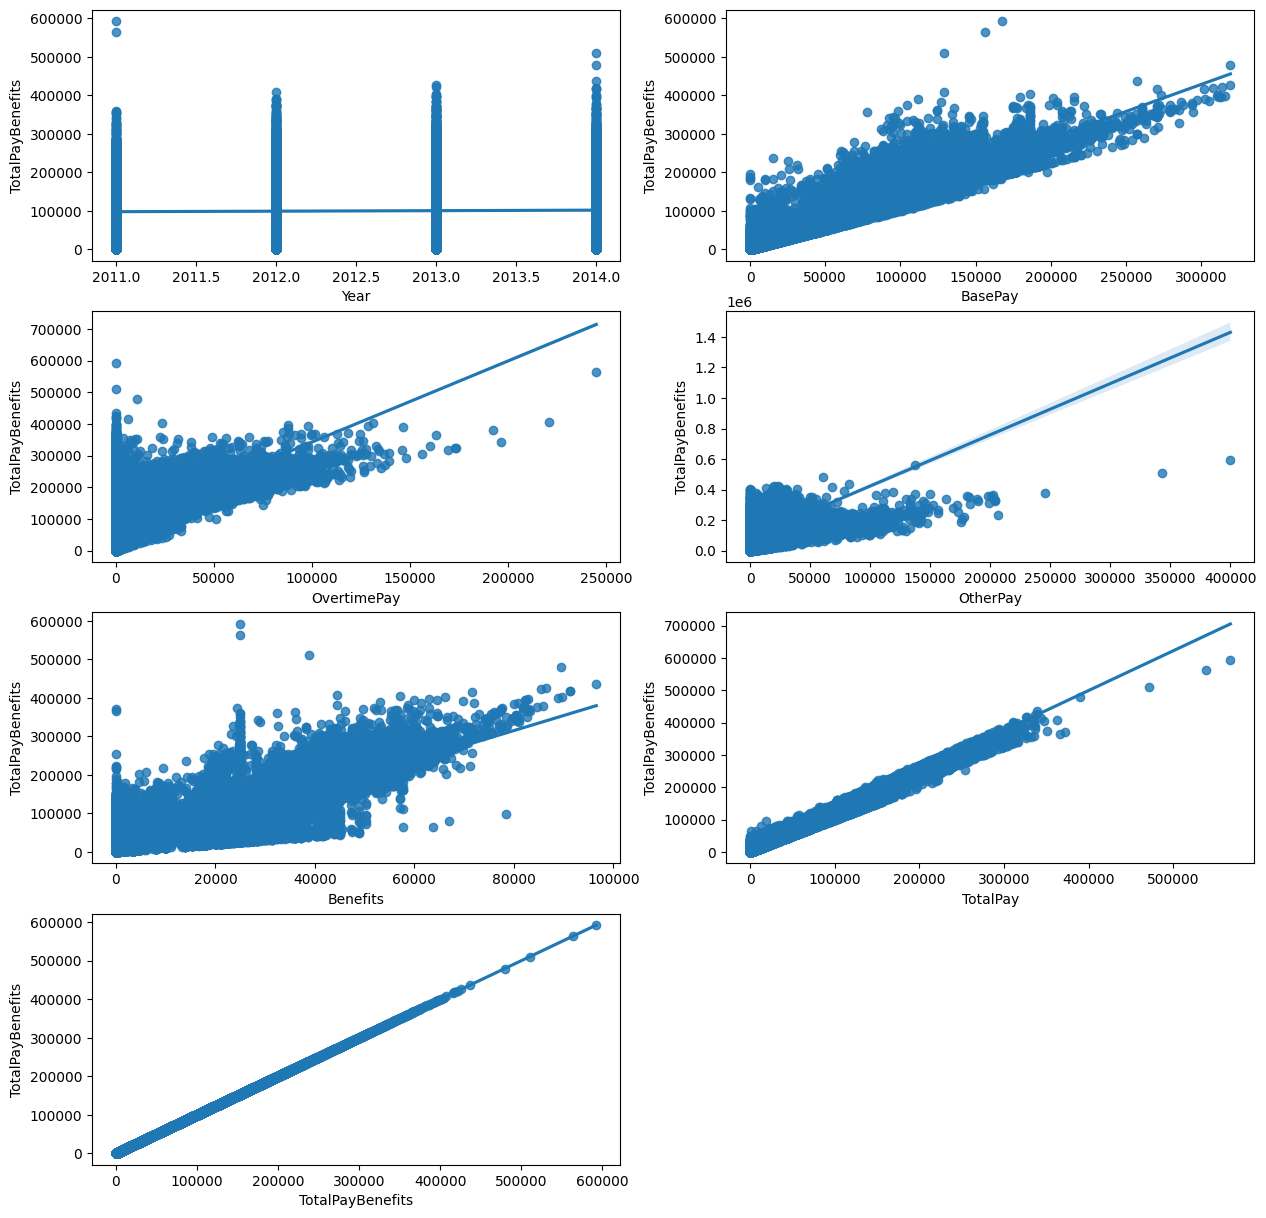

In [221]:
# Scatter Visualization using `Subplot()`  & `Regplot()` of all the numerical features with the target value
df_num = df.drop(['Id', 'Status', 'Notes'], axis = 1).select_dtypes(include = np.number)
cols = ['Year','BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits']
df_num = df_num[cols]
plt.figure(figsize = [15, 15])
# example of somewhat too-large bin size
for i in range(len(df_num.columns)): #range 0 to 6
    plt.subplot(4, 2, 1+i)
    sns.regplot(data = df_num, x =df_num.columns[i], y = 'TotalPayBenefits');
    plt.xlabel(df_num.columns[i]);
    plt.ylabel('TotalPayBenefits');

In [228]:
#  Identify any correlation between salary and another numerical column
df_num_corr = df_num.corr()['TotalPayBenefits']
print('Correlation between numerical features and TotalPayBenefits:\n',df_num_corr,sep='')
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print('\nCorrelation between Top numerical features and TotalPayBenefits:\n',top_features,sep='')

Correlation between numerical features and TotalPayBenefits:
Year                0.023827
BasePay             0.961527
OvertimePay         0.469330
OtherPay            0.432390
Benefits            0.885029
TotalPay            0.991416
TotalPayBenefits    1.000000
Name: TotalPayBenefits, dtype: float64

Correlation between Top numerical features and TotalPayBenefits:
TotalPayBenefits    1.000000
TotalPay            0.991416
BasePay             0.961527
Benefits            0.885029
Name: TotalPayBenefits, dtype: float64


In [229]:
# Checking the Skewness of the Target Varaible (Total Pay Benefits)
df['TotalPayBenefits'].skew()

0.34622669889761654

#Step7: Summary of Insights

> 1- The Target variable (i.e. TotalPayBenefits) follow a fairly symmetrical bell curve or normal distribution; and this is assured with the skewness value of 0.35 which falls within the range of -0.5 and 0.5;

> 2- The strongly correlated numerical attributes with the target variable are consecutively (Total Pay, Base Pay and Benefits) which correpsondingly have a correlation factor of (0.99, 0.96, 0.88) which reflects up to a certain extent the logic behind the equations and formulas based on which these variables are calculated;

> 3- Most of the employees work mainly for the following listed sectors:
 * Transit Operation (6%)
 * Nursing (6%)
 * Custody (2%)
 * FireFighting (2%)
 * Recreation Leader (1%)
 * Deputy Sheriff (1%)
 * Police Officer (1%)
 * Patient Care Assistant (1%)

>**4- The section of the 'Grouped Analysis' requires an assistance from your side please to analyse it!**

# Thank You!